<a href="https://colab.research.google.com/github/health4924/Brain-Tumor-MRI-Image-Classification/blob/main/Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Brain Tumor Detection Project**

In [ ]:
# importing the reqired packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
tf.config.list_physical_devices("Gpu")


[]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data="/content/drive/MyDrive/Final_project/Tumor/train"
test_data="/content/drive/MyDrive/Final_project/Tumor/test"
valid_data="/content/drive/MyDrive/Final_project/Tumor/valid"

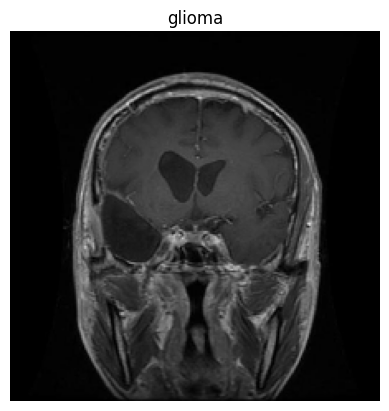

In [ ]:
 #  viewing each class images
# Giloma
glioma_image="/content/drive/MyDrive/Final_project/Tumor/train/glioma/Tr-gl_0011_jpg.rf.61e213cb5a0f97fedd1bacd0428c0133.jpg"
img=load_img(glioma_image,target_size=(224,224))
plt.imshow(img)
plt.title("glioma")
plt.axis("off")
plt.show()


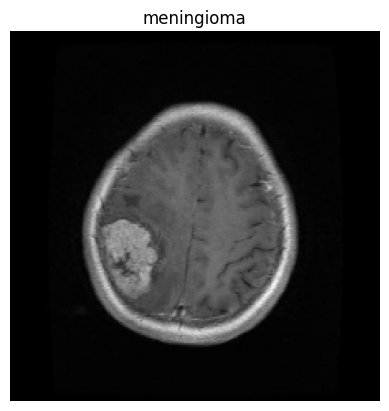

In [ ]:
meningioma_image="/content/drive/MyDrive/Final_project/Tumor/train/meningioma/Tr-me_0011_jpg.rf.c039f84f918b11f4a74316cd5bb2c231.jpg"
img=load_img(meningioma_image,target_size=(224,224))
plt.imshow(img)
plt.title("meningioma")
plt.axis("off")
plt.show()

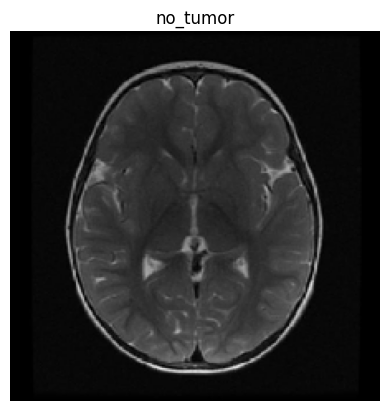

In [ ]:
no_tumor_image="/content/drive/MyDrive/Final_project/Tumor/train/no_tumor/Tr-no_0013_jpg.rf.ba75dd083e4c092e31fd59db1a7de9dc.jpg"
img=load_img(no_tumor_image,target_size=(224,224))
plt.imshow(img)
plt.title("no_tumor")
plt.axis("off")
plt.show()

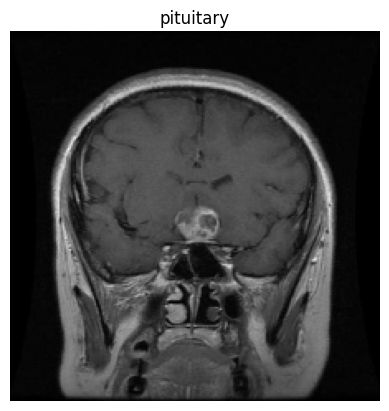

In [ ]:
pituitary_image="/content/drive/MyDrive/Final_project/Tumor/train/pituitary/Tr-pi_0010_jpg.rf.caed12ef1e5fad2e91a79e5773efc0bb.jpg"
img=load_img(pituitary_image,target_size=(224,224))
plt.imshow(img)
plt.title("pituitary")
plt.axis("off")
plt.show()

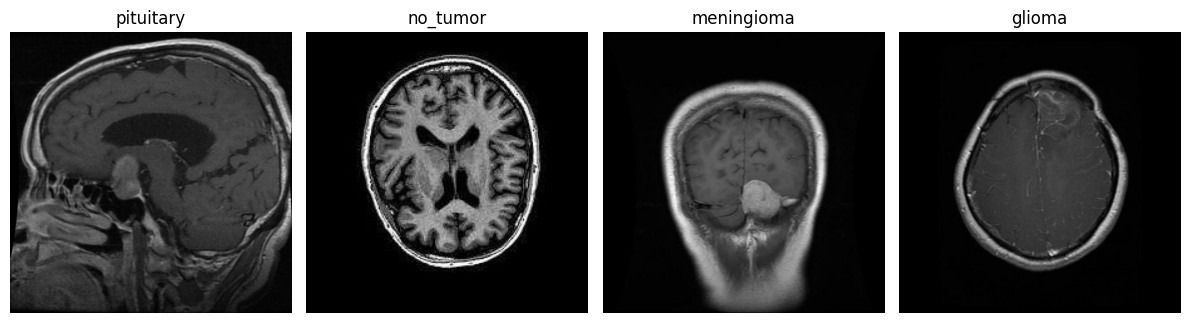

In [ ]:
# seeing all class images in the train directory

import os
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/Final_project/Tumor/train'

# Get only directories (skip files)
class_names = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

plt.figure(figsize=(12, 6))

for idx, class_name in enumerate(class_names):
    class_folder = os.path.join(base_path, class_name)
    image_list = os.listdir(class_folder)
    image_path = os.path.join(class_folder, image_list[0])
    img = load_img(image_path)

    plt.subplot(1, len(class_names), idx + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()



# Data Agumentation


In [ ]:

# taining data genarator with agumentasion
train_datagen=ImageDataGenerator(rescale=1./255,
                                  rotation_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                 fill_mode="nearest")

# validation and test data genarator only rescaleing no data agumentation
valid_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)











In [ ]:
# seting image size and batch size
img_size=(224,224)
batch_size=32

# creating data gendrators
train_generator=train_datagen.flow_from_directory(train_data,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical")
valid_generator=valid_datagen.flow_from_directory(valid_data,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical")
test_generator=test_datagen.flow_from_directory(test_data,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical")


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


In [ ]:
# class name and no_class
print(train_generator.class_indices)
class_name=list(train_generator.class_indices.keys())
no_class=len(class_name)
print("no_of_class:",no_class)

{'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}
no_of_class: 4


# ***Building the CNN***


In [ ]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation="relu"),
    layers.Dense(no_class,activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,680,580 (36.93 MB)

 Trainable params: 9,680,580 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 1356s 26s/step - accuracy: 0.4108 - loss: 1.3986 - precision: 0.4102 - recall: 0.1007 - val_accuracy: 0.6917 - val_loss: 0.7761 - val_precision: 0.7719 - val_recall: 0.5500
Epoch 2/10
 1/52 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.5938 - loss: 0.8819 - precision: 0.7273 - recall: 0.5000

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 292ms/step - accuracy: 0.5938 - loss: 0.8819 - precision: 0.7273 - recall: 0.5000 - val_accuracy: 0.6833 - val_loss: 0.7688 - val_precision: 0.7500 - val_recall: 0.6062
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 82s 952ms/step - accuracy: 0.6418 - loss: 0.8964 - precision: 0.7106 - recall: 0.5213 - val_accuracy: 0.7750 - val_loss: 0.6989 - val_precision: 0.8273 - val_recall: 0.6187
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7812 - loss: 0.6967 - precision: 0.7586 - recall: 0.6875 - val_accuracy: 0.7625 - val_loss: 0.6968 - val_precision: 0.8283 - val_recall: 0.6229
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7538 - loss: 0.6502 - precision: 0.8106 - recall: 0.6958 - val_accuracy: 0.7646 - val_loss: 0.5927 - val_precision: 0.8056 - val_recall: 0.7250
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6875 - loss: 0.6520 - precision: 0.7333 - recall: 0.6875 - val_accuracy: 0.7792 - val_loss: 0.5620 - val_pr

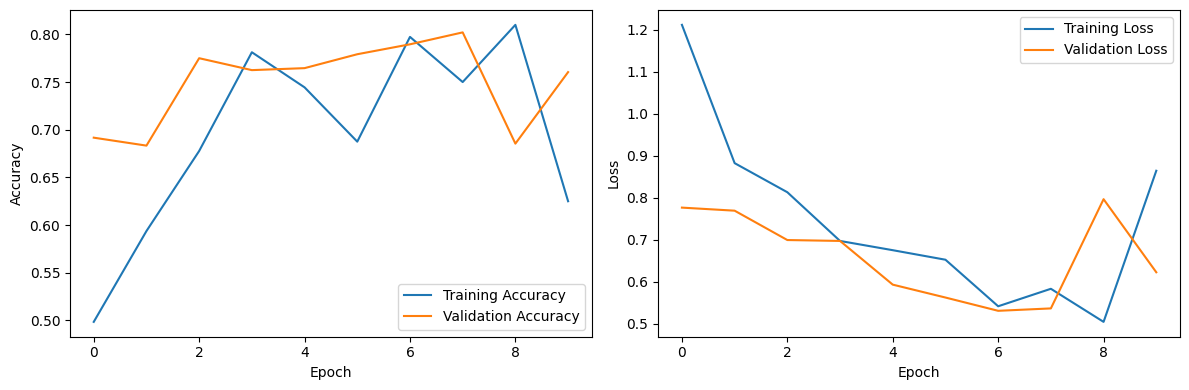

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [ ]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator)
print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test precision: {test_precision:.4f}')
print(f'Test recall: {test_recall:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 140s 18s/step - accuracy: 0.7735 - loss: 0.6065 - precision: 0.7880 - recall: 0.7420

Test accuracy: 0.7480
Test precision: 0.7619
Test recall: 0.7154


In [ ]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step


In [ ]:
true_classes = test_generator.classes


In [ ]:
print('\nClassification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Confusion matrix
conf_mat = confusion_matrix(true_classes, predicted_classes)
print('\nConfusion Matrix:')
print(conf_mat)


Classification Report:
              precision    recall  f1-score   support

   pituitary       0.32      0.24      0.27        80
    no_tumor       0.37      0.32      0.34        63
  meningioma       0.23      0.37      0.28        49
      glioma       0.29      0.30      0.29        54

    accuracy                           0.30       246
   macro avg       0.30      0.30      0.30       246
weighted avg       0.31      0.30      0.30       246


Confusion Matrix:
[[19 17 26 18]
 [14 20 19 10]
 [12  8 18 11]
 [14  9 15 16]]


# **Transfer learning models**

In [ ]:
from tensorflow.keras.applications import (VGG16, ResNet50, MobileNet,
                                          InceptionV3, EfficientNetB0)
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model_comparison = []

In [ ]:
# vgg16
def evaluate_vgg16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.2),
        Dense(no_class, activation='softmax')
    ])

    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall')])

    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

vgg_model, vgg_history = evaluate_vgg16()
model_comparison.append({
    'Model': 'VGG16',
    'Val Accuracy': max(vgg_history.history['val_accuracy']),
    'Val Precision': max(vgg_history.history['val_precision']),
    'Val Recall': max(vgg_history.history['val_recall']),
    'Parameters': f"{vgg_model.count_params():,}",
    'Inference Time': 'Medium',
    'Best For': 'Medium-sized datasets'
})

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1203s 23s/step - accuracy: 0.2519 - loss: 1.7463 - precision: 0.2234 - recall: 0.0852 - val_accuracy: 0.3984 - val_loss: 1.3019 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1250s 24s/step - accuracy: 0.4433 - loss: 1.2951 - precision: 0.5484 - recall: 0.0517 - val_accuracy: 0.5478 - val_loss: 1.1490 - val_precision: 0.9043 - val_recall: 0.1693
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1198s 23s/step - accuracy: 0.5230 - loss: 1.1640 - precision: 0.7853 - recall: 0.1622 - val_accuracy: 0.5936 - val_loss: 1.0523 - val_precision: 0.8069 - val_recall: 0.2331
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1204s 23s/step - accuracy: 0.5513 - loss: 1.0828 - precision: 0.7828 - recall: 0.2533 - val_accuracy: 0.6474 - val_loss: 0.9869 - val_precision: 0.8000 - val_recall: 0.2789
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1191s 23s/step - accuracy: 0.6533 - loss: 0.9621 - precisio

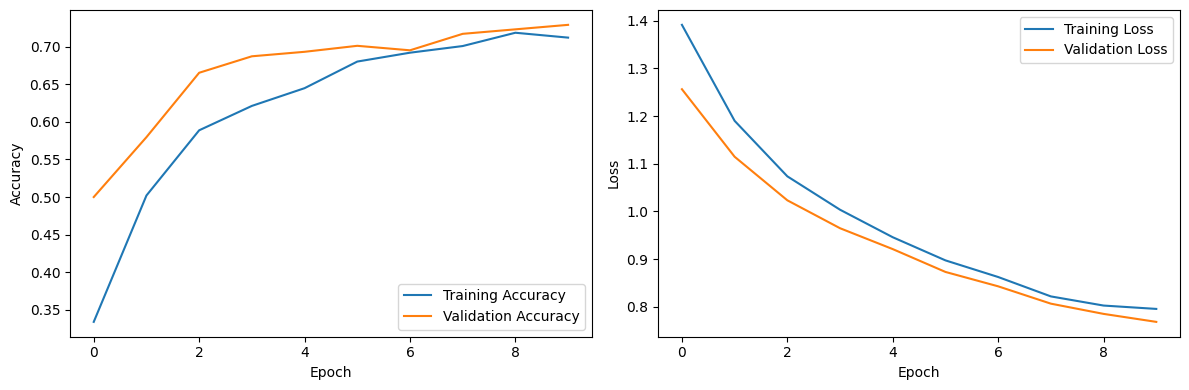

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.7312 - loss: 0.7806 - precision: 0.8418 - recall: 0.4958

Test accuracy: 0.7398
Test precision: 0.8630
Test recall: 0.5122
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step


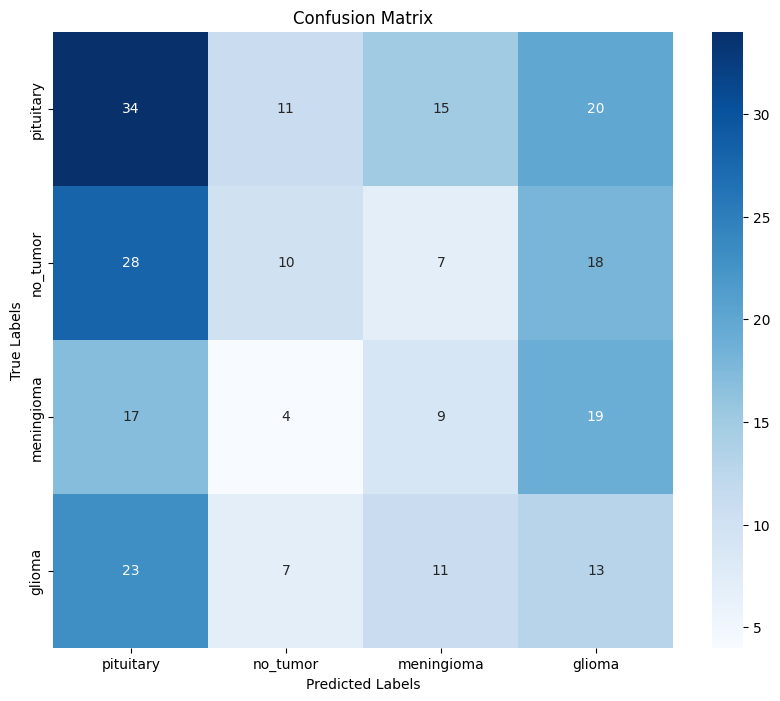

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(vgg_history)


# Evaluate on test set (assuming you have a test_generator)
test_generator.reset() # Reset the generator before evaluating
test_loss, test_acc, test_precision, test_recall = vgg_model.evaluate(test_generator)
print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test precision: {test_precision:.4f}')
print(f'Test recall: {test_recall:.4f}')


# Generate predictions
predictions = vgg_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Confusion Matrix
conf_mat = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# resnet50
def evaluate_resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = tf.keras.applications.resnet50.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(no_class, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy', 'precision', 'recall'])

    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

resnet_model, resnet_history = evaluate_resnet50()
model_comparison.append({
    'Model': 'ResNet50',
    'Val Accuracy': max(resnet_history.history['val_accuracy']),
    'Val Precision': max(resnet_history.history['val_precision']),
    'Val Recall': max(resnet_history.history['val_recall']),
    'Parameters': f"{resnet_model.count_params():,}",
    'Inference Time': 'Medium',
    'Best For': 'General purpose'
})


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 58s 836ms/step - accuracy: 0.3366 - loss: 1.5518 - precision: 0.3548 - recall: 0.1328 - val_accuracy: 0.4223 - val_loss: 1.2692 - val_precision: 0.8276 - val_recall: 0.0478
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 571ms/step - accuracy: 0.3866 - loss: 1.3097 - precision: 0.5354 - recall: 0.0706 - val_accuracy: 0.4442 - val_loss: 1.2019 - val_precision: 0.8372 - val_recall: 0.0717
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 575ms/step - accuracy: 0.4225 - loss: 1.2572 - precision: 0.6641 - recall: 0.1114 - val_accuracy: 0.4801 - val_loss: 1.1535 - val_precision: 0.8333 - val_recall: 0.1494
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 576ms/step - accuracy: 0.4672 - loss: 1.2157 - precision: 0.6519 - recall: 0.1218 - val_accuracy: 0.6215 - val_loss: 1.1291 - val_precision: 0.8222 - val_recall: 0.0737
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 575ms/step - accuracy: 0.4977 - loss: 1.1642 - precision: 0.744

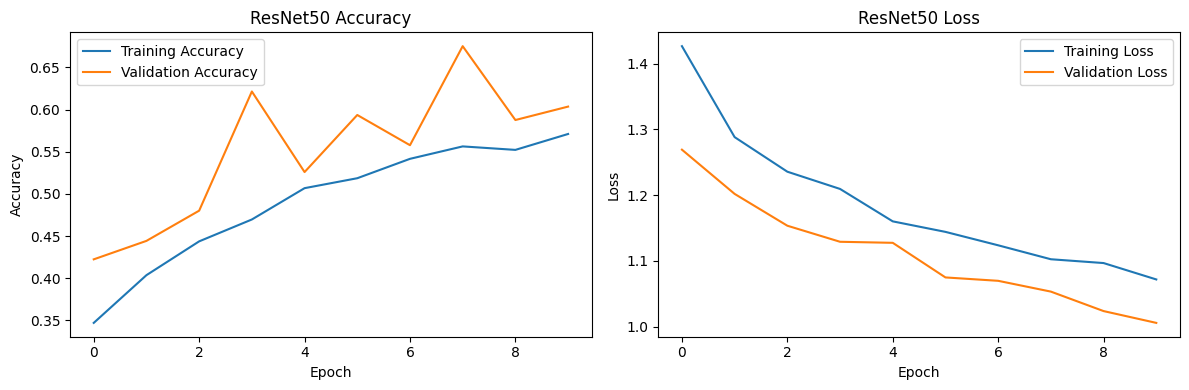

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name="ResNet50"):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call it with:
plot_history(resnet_history, "ResNet50")


8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 687ms/step


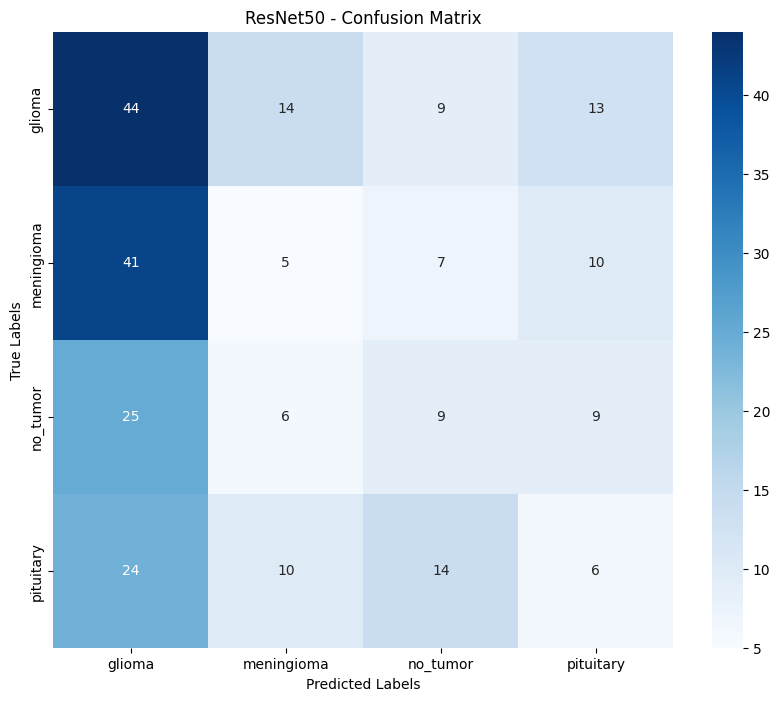

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get predictions
test_generator.reset()
predictions = resnet_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Get true class labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # class names

# Step 3: Generate confusion matrix
conf_mat = confusion_matrix(true_classes, predicted_classes)

# Step 4: Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('ResNet50 - Confusion Matrix')
plt.show()


# **Mobilenet**

In [ ]:
def evaluate_mobilenet():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.2),
        Dense(no_class, activation='softmax')
    ])

    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy', 'precision', 'recall'])

    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

mobilenet_model, mobilenet_history = evaluate_mobilenet()
model_comparison.append({
    'Model': 'MobileNet',
    'Val Accuracy': max(mobilenet_history.history['val_accuracy']),
    'Val Precision': max(mobilenet_history.history['val_precision']),
    'Val Recall': max(mobilenet_history.history['val_recall']),
    'Parameters': f"{mobilenet_model.count_params():,}",
    'Inference Time': 'Fast',
    'Best For': 'Mobile/Edge devices'
})

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 63s 935ms/step - accuracy: 0.4284 - loss: 1.4781 - precision: 0.4711 - recall: 0.3147 - val_accuracy: 0.7590 - val_loss: 0.6081 - val_precision: 0.8230 - val_recall: 0.6853
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 51s 548ms/step - accuracy: 0.7543 - loss: 0.6238 - precision: 0.8155 - recall: 0.6977 - val_accuracy: 0.8267 - val_loss: 0.4606 - val_precision: 0.8642 - val_recall: 0.7988
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 594ms/step - accuracy: 0.8253 - loss: 0.4714 - precision: 0.8656 - recall: 0.7762 - val_accuracy: 0.8386 - val_loss: 0.4291 - val_precision: 0.8675 - val_recall: 0.8088
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 551ms/step - accuracy: 0.8629 - loss: 0.3996 - precision: 0.8926 - recall: 0.8172 - val_accuracy: 0.8108 - val_loss: 0.4860 - val_precision: 0.8440 - val_recall: 0.7869
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 29s 546ms/step - accuracy: 0.8769 - loss: 0.3498 - precision: 0.893

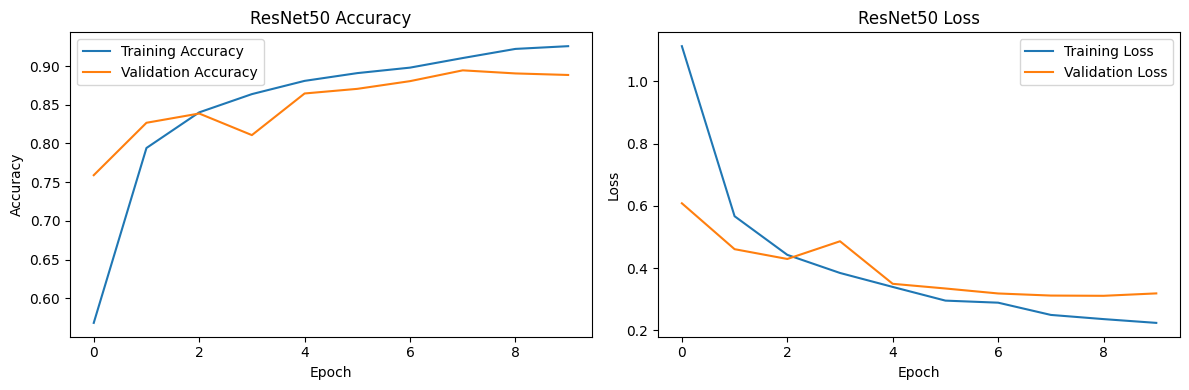

In [ ]:
plot_history(mobilenet_history)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.8625 - loss: 0.3084 - precision: 0.8795 - recall: 0.8512

MobileNet Test accuracy: 0.8577
MobileNet Test precision: 0.8745
MobileNet Test recall: 0.8496


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 562ms/step


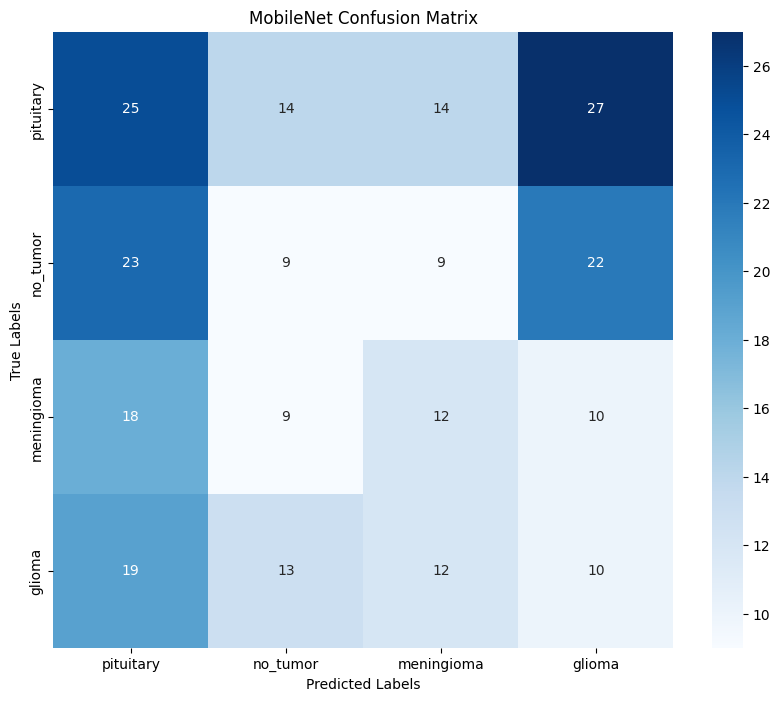

In [ ]:
test_generator.reset()  # Reset the generator before evaluating
test_loss, test_acc, test_precision, test_recall = mobilenet_model.evaluate(test_generator)
print(f'\nMobileNet Test accuracy: {test_acc:.4f}')
print(f'MobileNet Test precision: {test_precision:.4f}')
print(f'MobileNet Test recall: {test_recall:.4f}')

# Generate predictions for MobileNet
predictions = mobilenet_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes for MobileNet
true_classes = test_generator.classes

# Confusion Matrix for MobileNet
conf_mat = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix for MobileNet using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('MobileNet Confusion Matrix')
plt.show()

In [ ]:
def evaluate_inception():
    # Special generator for Inception's 299x299 input
    inception_train_gen = train_datagen.flow_from_directory(
        train_data, target_size=(299, 299), batch_size=batch_size)
    inception_val_gen = valid_datagen.flow_from_directory(
        valid_data, target_size=(299, 299), batch_size=batch_size)

    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(299, 299, 3))
    x = tf.keras.applications.inception_v3.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(no_class, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy', 'precision', 'recall'])

    history = model.fit(
        inception_train_gen,
        validation_data=inception_val_gen,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

inception_model, inception_history = evaluate_inception()
model_comparison.append({
    'Model': 'InceptionV3',
    'Val Accuracy': max(inception_history.history['val_accuracy']),
    'Val Precision': max(inception_history.history['val_precision']),
    'Val Recall': max(inception_history.history['val_recall']),
    'Parameters': f"{inception_model.count_params():,}",
    'Inference Time': 'Medium',
    'Best For': 'Multi-scale features'
})

Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.4055 - loss: 1.3006 - precision: 0.5787 - recall: 0.0547 - val_accuracy: 0.5757 - val_loss: 1.1306 - val_precision: 0.6957 - val_recall: 0.0956
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 103s 864ms/step - accuracy: 0.5222 - loss: 1.1616 - precision: 0.7486 - recall: 0.1589 - val_accuracy: 0.6155 - val_loss: 1.0332 - val_precision: 0.8199 - val_recall: 0.2629
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 83s 870ms/step - accuracy: 0.5641 - loss: 1.0828 - precision: 0.7262 - recall: 0.2446 - val_accuracy: 0.6454 - val_loss: 0.9777 - val_precision: 0.8158 - val_recall: 0.3088
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 45s 857ms/step - accuracy: 0.5946 - loss: 1.0013 - precision: 0.7852 - recall: 0.3174 - val_accuracy: 0.6614 - val_loss: 0.9342 - val_precision: 0.8286 - val_recall: 0.3466
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 877ms/step - accuracy: 0.6290 - loss: 0.9753 - precision: 0.7665 - recall: 0.3486 - val_accuracy: 0.6414 - val_loss:

Model Comparison

In [ ]:
import pandas as pd
comparison_df = pd.DataFrame(model_comparison)
comparison_df = comparison_df.sort_values('Val Accuracy', ascending=False)
comparison_df.style.background_gradient(cmap='Blues', subset=['Val Accuracy', 'Val Precision', 'Val Recall'])

,Model,Val Accuracy,Val Precision,Val Recall,Parameters,Inference Time,Best For
2,MobileNet,0.894422,0.910603,0.872510,"3,232,964",Fast,Mobile/Edge devices
0,VGG16,0.729084,0.890000,0.484064,"14,716,740",Medium,Medium-sized datasets
3,InceptionV3,0.689243,0.828571,0.500000,"21,810,980",Medium,Multi-scale features
1,ResNet50,0.675299,0.842105,0.314741,"23,595,908",Medium,General purpose


In [ ]:
comparison_df.to_csv("/content/drive/MyDrive/Final_project/model_comparison.csv", index=False)

The best performing model is:
Model                       MobileNet
Val Accuracy                 0.894422
Val Precision                0.910603
Val Recall                    0.87251
Parameters                  3,232,964
Inference Time                   Fast
Best For          Mobile/Edge devices
Name: 0, dtype: object


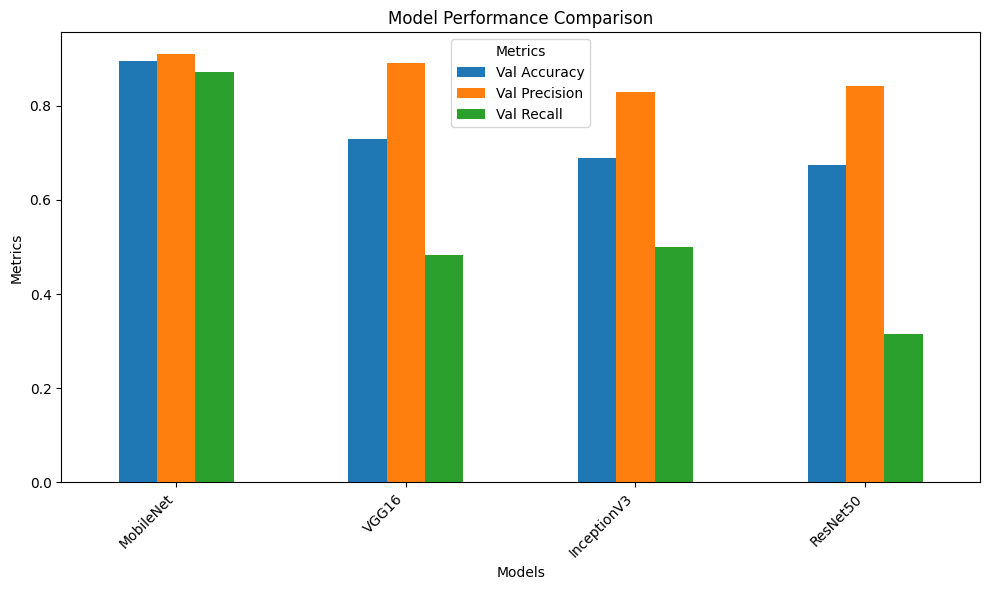

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final_project/model_comparison.csv')


# Find the best model based on validation accuracy
best_model = df.loc[df['Val Accuracy'].idxmax()]

print(f"The best performing model is:\n{best_model}")

# Plotting the bar chart
plt.figure(figsize=(10, 6))
df.plot(x='Model', y=['Val Accuracy', 'Val Precision', 'Val Recall'], kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.ylabel('Metrics')
plt.xlabel('Models')


plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [ ]:
mobilenet_model.save('/content/drive/MyDrive/Final_project/model_mobilenet.h5')

In [ ]:
!pip install streamlit numpy pillow tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 128.4 MB/s eta 0:00:00


In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
code = '''
import streamlit as st
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import os

# Define class labels
CLASSES = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

# Load model from Google Drive path
@st.cache_resource
def load_custom_model():
    model_path = "/content/drive/MyDrive/Final_project/model_mobilenet.h5"
    if not os.path.exists(model_path):
        st.error(f"❌ Model file not found at {model_path}")
        return None
    return load_model(model_path)

model = load_custom_model()

if model is None:
    st.stop()

# App title and instructions
st.title("🧠 Brain Tumor MRI Classifier")
st.write("Upload an MRI image. The model will predict the tumor type.")

# Upload image
uploaded_file = st.file_uploader("📂 Choose an MRI image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Show uploaded image
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded MRI Image", use_container_width=True)

    # Preprocess image
    image = image.resize((224, 224))
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Predict
    with st.spinner("🔍 Identifying tumor type..."):
        try:
            predictions = model.predict(image_array)
            predicted_class = CLASSES[np.argmax(predictions)]
            confidence = np.max(predictions)
        except Exception as e:
            st.error(f"Prediction failed: {e}")
            st.stop()

    # Show prediction result
    st.subheader("✅ Predicted Results:")
    st.success(f"Tumor Type: **{predicted_class}**")
    st.info(f"Confidence: **{confidence * 100:.2f}%**")

    # Show all class probabilities
    st.subheader("📊 Class Probabilities:")
    for cls, prob in zip(CLASSES, predictions[0]):
        st.write(f"{cls}: {prob * 100:.2f}%")
        st.progress(float(prob))
'''
with open('app.py', 'w') as f:
    f.write(code)


In [ ]:
from pyngrok import conf, ngrok

# Set your authtoken
conf.get_default().auth_token = "31QdTBTVR6MqTZ79HMMU36vAMSC_3H5EiPJDgwwd5GVVuUr7G"

# Kill any existing tunnels
ngrok.kill()

# Start the tunnel with HTTP spec
public_url = ngrok.connect("http://localhost:8501")

print("✅ Streamlit app is live at:", public_url)

# Run the app
!streamlit run app.py &>/dev/null &
